# Shape Extraction (for Region)
* label concept
* neighbor concept
1. Connection
2. Area
3. Corner Codinate
4. Width, Height, (Smallest Rectangle 1)

In [16]:
import cv2 
import numpy as np
import matplotlib.pylab as plt

def show(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")

# Stack 

1. push value
2. pop value
3. check empty 

## Push Value

In [8]:
stack_value = []
stack_value.append((100,200))
stack_value

[(100, 200)]

## Pop Value

In [ ]:
pop_value = stack_value.pop()

In [13]:
if stack_value: 
    print("Khong rong")
else:
    print("Empty")
    
stack_value.append((40,50))

Empty


In [14]:
pop_value = stack_value.pop()
pop_value

(40, 50)

In [10]:
pop_value

(100, 200)

# List, min, max value of list

In [ ]:
list_value = []
list_value.append((100,200))

value_1 = list_value[1]
value_1

# Connection Function

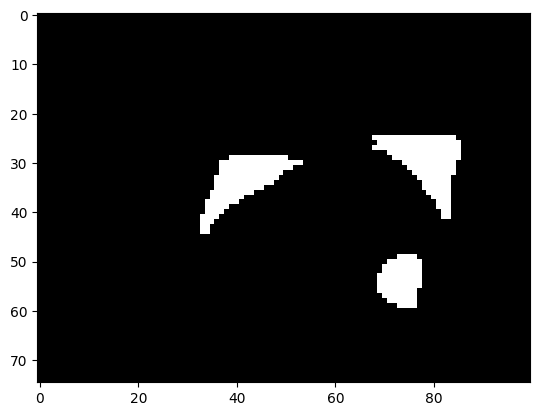

In [18]:
img = cv2.imread("images/mor3.png")
show(img)

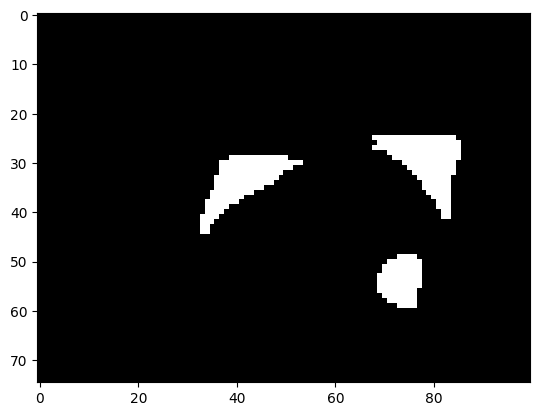

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T, threshold =cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

plt.imshow(threshold,cmap= 'gray')

In [20]:
def connection(threshold, neighbor = 4):
    
    """
        threshold: anh sau khi nhi phan hoa (+ Morphological)
        neighbor: So diem hang xom xung quanh pixel dang xet ( neighbor = 4 |  neighbor = 8)
        
        data: luu top ,left, width , height, area 
    """
    width  = threshold.shape[1]
    height  = threshold.shape[0]
    
    labels = np.zeros((height,width),dtype=np.uint8)
    data =[] 
    center =[]
    num_obj = 0
    current_label = 1
    
    for y in range(height):
        for x in range(width):
            
            # Xet pixel dau tien de bat dau va pixel do chua duoc label
            if threshold[y,x] ==255 and labels[y,x] ==0:
                
                stack_point=[(y,x)]
                area = 0
                left = x
                top = y
                bottom = y
                right =x
                while stack_point: # thuc hien block trong khi stack van con gia tri 
                    y, x = stack_point.pop()
                    if labels[y,x] ==0:
                        labels[y,x] = current_label
                        area+=1 
                        left = min(left,x)
                        top = min(top,y)
                        bottom = max  (bottom,y)
                        right = max  (right,x)
                        
                    if neighbor ==4: 
                        
                        if y > 0 and threshold[y-1,x] ==255 and labels[y-1,x] ==0: # TOP
                            stack_point.append((y-1,x))
                        
                        if x < width-1 and threshold[y,x+1] ==255 and labels[y,x+1] ==0: # RIGHT
                            stack_point.append((y,x+1))
                        
                        if y < height-1 and threshold[y+1,x] ==255 and labels[y+1,x] ==0: # BOTTOM
                            stack_point.append((y+1,x))
                        
                        if x > 0 and threshold[y,x-1] == 255 and labels[y,x-1] ==0: # LEFT
                            stack_point.append((y,x-1))   

                        pass
                    elif neighbor ==8:
                        
                        pass
                    
                current_label +=1
                num_obj+=1
                
                c_x = left + (right - left)/2
                c_y = top + (bottom - top)/2
                data_temp = [(top,left),(right - left),bottom - top,(c_y, c_x),area]
                data.append(data_temp)
                
    return num_obj,labels, data

In [25]:
num_obj,labels, data = connection(threshold,neighbor= 4)

In [43]:
num_obj

3

In [29]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Threshold T

In [38]:
def threshold_range(img, T1, T2):
    _,th1 = cv2.threshold(img, T1,255, cv2.THRESH_BINARY_INV)
    _,th2 = cv2.threshold(img, T2,255, cv2.THRESH_BINARY_INV)
    
    th_range = cv2.bitwise_xor(th1,th2)
    
    return th_range

[(25, 68), 17, 16, (33.0, 76.5), 149]


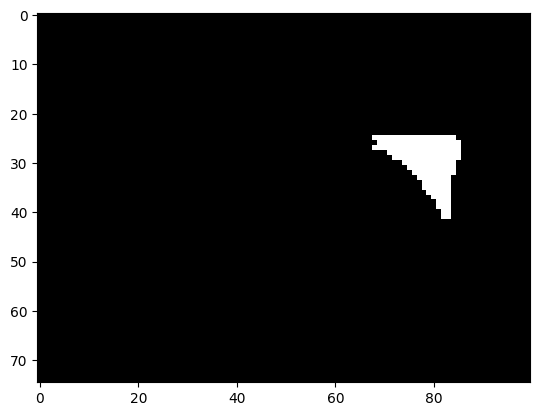

In [51]:
region1 = threshold_range(labels,0,1)
plt.imshow(region1,cmap="gray")
print(data[0])

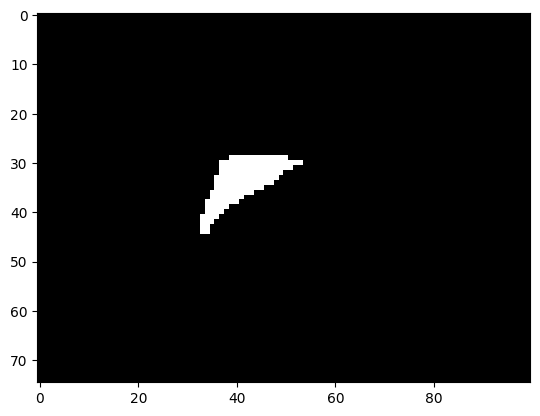

In [52]:
list_region = []
for i in range(num_obj):
    region = threshold_range(labels,i, i+1)
    list_region.append(region)
    

plt.imshow(list_region[1],cmap="gray")


# OpenCV

In [55]:
output = cv2.connectedComponentsWithStats(threshold, 4, cv2.CV_32S)
threshold.shape

(75, 100)

In [54]:
number_obj , labels, stats, center =  output

(4,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[   0,    0,  100,   75, 7137],
        [  68,   25,   18,   17,  149],
        [  33,   29,   21,   16,  135],
        [  69,   49,    9,   11,   79]], dtype=int32),
 array([[48.78912708, 37.01471206],
        [78.59060403, 30.02013423],
        [41.02962963, 34.02962963],
        [73.32911392, 53.91139241]]))